http://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.html

In [1]:
import pandas as pd
import numpy as np

In [2]:
df2 = pd.DataFrame(np.random.randint(low=0, high=10, size=(5, 5)), columns=['a', 'b', 'c', 'd', 'e']);df2

,a,b,c,d,e
0,9,8,3,3,9
1,2,0,7,4,2
2,1,0,5,0,0
3,1,0,0,9,5
4,7,8,5,3,5


In [8]:
df2.ndim, df2.shape, df2.size

(2, (5, 5), 25)

In [9]:
df2.values

array([[9, 8, 3, 3, 9],
       [2, 0, 7, 4, 2],
       [1, 0, 5, 0, 0],
       [1, 0, 0, 9, 5],
       [7, 8, 5, 3, 5]])

In [10]:
df2.index

RangeIndex(start=0, stop=5, step=1)

In [12]:
(df2.add(df2)).head(2)

,a,b,c,d,e
0,18,16,6,6,18
1,4,0,14,8,4


In [20]:
df2.add_prefix('no. ').head(2)

,no. a,no. b,no. c,no. d,no. e
0,9,8,3,3,9
1,2,0,7,4,2


In [21]:
df2.add_suffix(' th').head(2)

,a th,b th,c th,d th,e th
0,9,8,3,3,9
1,2,0,7,4,2


In [109]:
#combine func is basically filling func for prior dataframe
df3 = df2.copy()
df3.columns = ['f','g','h','i','j']
##after combining, the df3's dtypes becomes float..
df2.combine_first(df3).astype(int).head(2)

##combine have to have the same index size, but not coulumns

,a,b,c,d,e,f,g,h,i,j
0,9,8,3,3,9,9,8,3,3,9
1,2,0,7,4,2,2,0,7,4,2


In [108]:
#df1’s values prioritized, use values from df2 to fill holes:
df_1 = pd.DataFrame([[1, np.nan]])
df_2 = pd.DataFrame([[3, 4]])
df_1.combine_first(df_2)

,0,1
0,1,4.0


In [90]:
#pandas weird things 
pd.DataFrame([0,1,2,3,4])

,0
0,0
1,1
2,2
3,3
4,4


In [91]:
pd.DataFrame([[0],[1],[2],[3],[4]])

,0
0,0
1,1
2,2
3,3
4,4


In [92]:
pd.DataFrame([[0,1],[1,2],[2,3],[3,4],[4,5]])

,0,1
0,0,1
1,1,2
2,2,3
3,3,4
4,4,5


In [111]:
df4 = df2.copy()
#df4.append(df3.iloc[0], ignore_index=True)
#or
#be sure before append, do T
df4.append(pd.DataFrame(np.arange(5), index=df2.columns).T, ignore_index=True)

,a,b,c,d,e
0,9,8,3,3,9
1,2,0,7,4,2
2,1,0,5,0,0
3,1,0,0,9,5
4,7,8,5,3,5
5,0,1,2,3,4


In [116]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s1 = s[:4]
s2 = s[1:]
(s1.align(s2))[1]

a         NaN
b    0.160327
c    1.782136
d    2.048437
e   -0.868433
dtype: float64

https://pandas.pydata.org/pandas-docs/stable/basics.html#aligning-objects-with-each-other-with-align

In [235]:
#df4.as_matrix()
df4.values

array([[9, 8, 3, 3, 9],
       [2, 0, 7, 4, 2],
       [1, 0, 5, 0, 0],
       [1, 0, 0, 9, 5],
       [7, 8, 5, 3, 5]])

In [236]:
import random
df = pd.DataFrame({
    'year': range(2000, 2011), 
    'month': range(1,12), 
    'day': [random.choice(range(1,20)) for i in range(0, 11)]
})
df = df.assign(date = lambda x: pd.to_datetime(x[['year', 'month','day']]))
#df['date']= pd.to_datetime(df[['year', 'month','day']]);df

df = df.set_index('date')
df_v = pd.DataFrame(dict(d = np.random.randn(len(df.asfreq('W')))), index = df.asfreq('W').index)
df_v = df_v.apply(lambda x:x.abs())
df_vm = (df_v.groupby(pd.Grouper(freq='M')).sum()).cumsum()

# df.groupby(by=[b.index.month, b.index.year])
# or
# df.groupby(pd.Grouper(freq='M'))

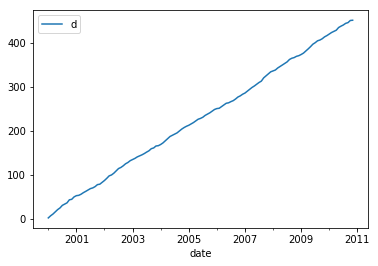

In [237]:
df_vm.plot()

In [241]:
#clipping
data = {'col_0': [9, -5, 0, -1, 5]}
df = pd.DataFrame(data); df

,col_0
0,9
1,-5
2,0
3,-1
4,5


In [243]:
df.clip(-4, 4) #lower -4, upper 4

,col_0
0,4
1,-4
2,0
3,-1
4,4


In [245]:
t = pd.Series([2, -4, -1, 6, 3])
df.clip(t,t+4, axis=0)

,col_0
0,6
1,-4
2,0
3,6
4,5


In [246]:
#if you wanna apply either upper or lower
s = pd.Series([5, 6, 7, 8, 9])
s.clip_lower(8)

0    8
1    8
2    8
3    8
4    9
dtype: int64

In [247]:
##cum max 
s = pd.Series([2, np.nan, 5, -1, 0])
s.cummax()

0    2.0
1    NaN
2    5.0
3    5.0
4    5.0
dtype: float64

In [259]:
s.cummax(skipna=False)

0    2.0
1    NaN
2    NaN
3    NaN
4    NaN
dtype: float64

In [262]:
## ending values euqals to max() methods
s.cummax().iloc[-1] == s.max()

True

In [264]:
## return minimum values
s.cummin()

0    2.0
1    NaN
2    2.0
3   -1.0
4   -1.0
dtype: float64

In [286]:
df = pd.DataFrame({'A': [1., 1., 1., 2., 2., 2.], 'B': np.arange(1., 7.)})
df2 = pd.DataFrame(data=df.A)
v1 = np.array([2,2,2,3,3,3]) # this is for 6 different colomns
v2 = np.array([2,3]) # this is for 2 different colomns
v3 = np.array([[2],[2],[2],[3],[3],[3]]) # this is for 1 different colomns 6 rows
df

,A,B
0,1.0,1.0
1,1.0,2.0
2,1.0,3.0
3,2.0,4.0
4,2.0,5.0
5,2.0,6.0


In [287]:
df2

,A
0,1.0
1,1.0
2,1.0
3,2.0
4,2.0
5,2.0


In [288]:
#df.mul(v1) xxxx err
#df.dot(v1) xxxx err

In [291]:
#df2.mul(v1)xxxx err
#df2.dot(v1)xxxx err
df2.mul(v3)
#df2.dot(v3) xxxx err

,A
0,2.0
1,2.0
2,2.0
3,6.0
4,6.0
5,6.0


In [267]:
df.mul(v2)

,A,B
0,2.0,3.0
1,2.0,6.0
2,2.0,9.0
3,4.0,12.0
4,4.0,15.0
5,4.0,18.0


In [266]:
df.dot(v2)

0     5.0
1     8.0
2    11.0
3    16.0
4    19.0
5    22.0
dtype: float64

In [300]:
df = pd.DataFrame(np.arange(12).reshape(3,4),columns=['A', 'B', 'C', 'D'])

In [301]:
#colums
df.drop(['B','C'], axis=1)

,A,D
0,0,3
1,4,7
2,8,11


In [302]:
#rows
df.drop([0], axis=0)

,A,B,C,D
1,4,5,6,7
2,8,9,10,11


In [304]:
#index and columns at once
df.drop(index=0, columns =['B','C'])

,A,D
1,4,7
2,8,11


In [306]:
midx = pd.MultiIndex(levels=[['lama', 'cow', 'falcon'],
                             ['speed', 'weight', 'length']],
                     labels=[[0, 0, 0, 1, 1, 1, 2, 2, 2],
                             [0, 1, 2, 0, 1, 2, 0, 1, 2]])
dff = pd.DataFrame(index=midx, columns=['big', 'small'],
                  data=[[45, 30], [200, 100], [1.5, 1], [30, 20],
                        [250, 150], [1.5, 0.8], [320, 250],
                        [1, 0.8], [0.3,0.2]]);
dff

big  small
lama   speed    45.0   30.0
       weight  200.0  100.0
       length    1.5    1.0
cow    speed    30.0   20.0
       weight  250.0  150.0
       length    1.5    0.8
falcon speed   320.0  250.0
       weight    1.0    0.8
       length    0.3    0.2

In [309]:
dff.drop(index=['length','weight'], level=1)

,,big,small
lama,speed,45.0,30.0
cow,speed,30.0,20.0
falcon,speed,320.0,250.0


In [310]:
dfc = pd.DataFrame({'A': range(1, 6), 'B': range(10, 0, -2)});dfc

,A,B
0,1,10
1,2,8
2,3,6
3,4,4
4,5,2


In [311]:
#amazing eval function
dfc.eval('A+B')

0    11
1    10
2     9
3     8
4     7
dtype: int64

In [313]:
dfc.eval('C = A + B')

,A,B,C
0,1,10,11
1,2,8,10
2,3,6,9
3,4,4,8
4,5,2,7


In [320]:
i = pd.date_range('2018-04-09', periods=6, freq='2D')
tdf = pd.DataFrame({'A': [1,2,3,np.nan,5,6],'B': [np.nan,np.nan,3,4,np.nan,6]}, index=i);ts
ts = pd.DataFrame({'A': [1,2,3,4,5,6]}, index=i);ts

,A
2018-04-09,1
2018-04-11,2
2018-04-13,3
2018-04-15,4
2018-04-17,5
2018-04-19,6


In [318]:
#get first 1 week period
ts.first('W') 

,A
2018-04-09,1
2018-04-11,2
2018-04-13,3
2018-04-15,4


In [321]:
##how to get first valid values for both columns
first_valid_loc = tdf.apply(lambda col: col.first_valid_index()).max()
tdf.loc[first_valid_loc:]

,A,B
2018-04-13,3.0,3.0
2018-04-15,NaN,4.0
2018-04-17,5.0,NaN
2018-04-19,6.0,6.0


In [322]:
tdf

,A,B
2018-04-09,1.0,NaN
2018-04-11,2.0,NaN
2018-04-13,3.0,3.0
2018-04-15,NaN,4.0
2018-04-17,5.0,NaN
2018-04-19,6.0,6.0


In [331]:
last_valid_loc = tdf.apply(lambda col: col.last_valid_index()).min()
tdf.loc[first_valid_loc:last_valid_loc]

,A,B
2018-04-13,3.0,3.0
2018-04-15,NaN,4.0
2018-04-17,5.0,NaN
2018-04-19,6.0,6.0


In [332]:
##awesome from_dict method
data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
pd.DataFrame.from_dict(data)

,col_1,col_2
0,3,a
1,2,b
2,1,c
3,0,d


In [335]:
pd.DataFrame.from_dict(data, orient = 'index')

,0,1,2,3
col_1,3,2,1,0
col_2,a,b,c,d


In [346]:
pd.DataFrame.from_dict(data, orient = 'index', columns=[c.upper() for c in data['col_2']])

,A,B,C,D
col_1,3,2,1,0
col_2,a,b,c,d


In [348]:
#record style
sales = [('Jones LLC', 150, 200, 50),
         ('Alpha Co', 200, 210, 90),
         ('Blue Inc', 140, 215, 95)]
labels = ['account', 'Jan', 'Feb', 'Mar']
df = pd.DataFrame.from_records(sales, columns=labels);df

,account,Jan,Feb,Mar
0,Jones LLC,150,200,50
1,Alpha Co,200,210,90
2,Blue Inc,140,215,95


http://pbpython.com/pandas-list-dict.html

In [359]:
df = pd.DataFrame({"A": ["a", 1, 2, 3]})
df2 = df.iloc[1:];df

,A
0,a
1,1
2,2
3,3


In [360]:
df.dtypes

A    object
dtype: object

In [361]:
#infer_objects is not working
df.infer_objects().dtypes

A    object
dtype: object

In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 1 columns):
A    4 non-null object
dtypes: object(1)
memory usage: 112.0+ bytes


In [ ]:
#magic method to fill nan
s = pd.Series([0, 1, np.nan, 3])
s.interpolate()

In [364]:
df = pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]),orient='index', columns=['one', 'two', 'three'])

In [365]:
df

,one,two,three
B,4,5,6
A,1,2,3


In [368]:
#adding columns 
df.insert(1, 'baz', df['one']);df

,one,baz,bar,two,three
B,4,4,4,5,6
A,1,1,1,2,3


In [371]:
#delete columns 
df.pop('bar');df

,one,two,three
B,4,5,6
A,1,2,3


refernce:
http://pandas.pydata.org/pandas-docs/stable/dsintro.html#console-display

In [381]:
df = pd.DataFrame({'col1': [1, 2], 'col2': [0.1, 0.2]}, index=['a', 'b'])
for row in df.itertuples():
    print(row)

Pandas(Index='a', col1=1, col2=0.1)
Pandas(Index='b', col1=2, col2=0.2)


In [382]:
for row in df.iterrows():
    print(row)

('a', col1    1.0
col2    0.1
Name: a, dtype: float64)
('b', col1    2.0
col2    0.2
Name: b, dtype: float64)


In [384]:
df

,col1,col2
a,1,0.1
b,2,0.2


In [379]:
df.groupby(by='col1')

In [385]:
##first days
i = pd.date_range('2018-04-09', periods=4, freq='2D')
ts = pd.DataFrame({'A': [1,2,3,4]}, index=i)

,A
2018-04-09,1
2018-04-11,2
2018-04-13,3
2018-04-15,4


In [386]:
ts.first('3D')

,A
2018-04-09,1
2018-04-11,2


In [389]:
ts.last('D')

,A
2018-04-15,4


In [391]:
caller = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3', 'K4', 'K5'], 'A': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5']});caller

,A,key
0,A0,K0
1,A1,K1
2,A2,K2
3,A3,K3
4,A4,K4
5,A5,K5


In [392]:
other = pd.DataFrame({'key': ['K0', 'K1', 'K2'], 'B': ['B0', 'B1', 'B2']});other

,B,key
0,B0,K0
1,B1,K1
2,B2,K2


In [394]:
#default how='outer'
caller.join(other, lsuffix='_caller', rsuffix='_other')

,A,key_caller,B,key_other
0,A0,K0,B0,K0
1,A1,K1,B1,K1
2,A2,K2,B2,K2
3,A3,K3,NaN,NaN
4,A4,K4,NaN,NaN
5,A5,K5,NaN,NaN


In [398]:
# join combine by columns 
# take a close look at below two case.
# "other" have to have index to match to caller
# if it joined by "key"
caller.set_index('key').join(other.set_index('key'), on='key')

,A,B
key,,
K0,A0,B0
K1,A1,B1
K2,A2,B2
K3,A3,NaN
K4,A4,NaN
K5,A5,NaN


In [399]:
caller.join(other.set_index('key'), on='key')

,A,key,B
0,A0,K0,B0
1,A1,K1,B1
2,A2,K2,B2
3,A3,K3,NaN
4,A4,K4,NaN
5,A5,K5,NaN


In [403]:
# merge = A merge to B, thus how='right' : opposite idea from the join method
# default how='right'
caller.merge(other)

,A,key,B
0,A0,K0,B0
1,A1,K1,B1
2,A2,K2,B2


In [406]:
caller.merge(other, left_on='key', right_on='key', how='right')

,A,key,B
0,A0,K0,B0
1,A1,K1,B1
2,A2,K2,B2


In [433]:
#ditch the values whose difference with mean are more than mean absolute values
df = pd.DataFrame({
    'Type':['A','B','C','D','C','B','A','B']*2,
    'Name':['X','Y','Z','X','X','Z','X','Y']*2, 
    'Cost':np.random.randint(400,700, size=16)})

In [441]:
#df.groupby(['Name','Type']).agg(['mean','std']) 
groups = df.groupby(['Name','Type'])
mad = groups['Cost'].transform(lambda x: x.mad()) #allocate the value for each row
dif = groups['Cost'].transform(lambda x: np.abs(x - x.mean()))
df2, df3 = df[dif <= mad], df[dif > mad]

In [443]:
df2, df3

(    Cost Name Type
 0    540    X    A
 1    595    Y    B
 2    634    Z    C
 3    471    X    D
 4    638    X    C
 5    543    Z    B
 8    530    X    A
 9    549    Y    B
 10   509    Z    C
 11   652    X    D
 12   625    X    C
 13   695    Z    B
 14   521    X    A,     Cost Name Type
 6    628    X    A
 7    495    Y    B
 15   676    Y    B)

In [445]:
df = pd.DataFrame(np.arange(10).reshape(-1, 2), columns=['A', 'B'])
m = df % 3 == 0
df.where(m, -df) 

,A,B
0,0,-1
1,-2,3
2,-4,-5
3,6,-7
4,-8,9


In [446]:
s = pd.Series(range(5))
s.where(s > 0)

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [453]:
s.mask(~(s > 0))

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [454]:
df = pd.DataFrame({'a': [1, 10, 8, 10, -1],
                   'b': list('abdce'),
                   'c': [1.0, 2.0, np.nan, 3.0, 4.0]})

In [455]:
df.nlargest(3,'a')

,a,b,c
1,10,b,2.0
3,10,c,3.0
2,8,d,NaN


In [456]:
#nunique = return the number of the distinct number
df = pd.DataFrame({'A': [1, 2, 3], 'B': [1, 1, 1]})
df.nunique()

A    3
B    1
dtype: int64

In [457]:
df.nunique(axis=1)

0    1
1    2
2    2
dtype: int64

In [460]:
#percent change
s = pd.Series([90, 91, 85])
s.pct_change()

0         NaN
1    0.011111
2   -0.065934
dtype: float64

In [462]:
a = pd.DataFrame([1, 1, 1, np.nan], index=['a', 'b', 'c', 'd'], columns=['one'])
b = pd.DataFrame(dict(one=[1, np.nan, 1, np.nan], two=[np.nan, 2, np.nan, 2]), index=['a', 'b', 'd', 'e'])
a.radd(b, fill_value=0) #radd and add are the same

,one,two
a,2.0,NaN
b,1.0,2.0
c,1.0,NaN
d,1.0,NaN
e,NaN,2.0


In [468]:
df = pd.DataFrame.from_dict(dict(Auction_ID=[123,123,123,123,124,124,124,125], Bid_Price=[9,7,6,2,3,2,1,1]));df

,Auction_ID,Bid_Price
0,123,9
1,123,7
2,123,6
3,123,2
4,124,3
5,124,2
6,124,1
7,125,1


In [470]:
df['Auction_Rank'] = df.groupby('Auction_ID')['Bid_Price'].rank(ascending=False);df

,Auction_ID,Bid_Price,Auction_Rank
0,123,9,1.0
1,123,7,2.0
2,123,6,3.0
3,123,2,4.0
4,124,3,1.0
5,124,2,2.0
6,124,1,3.0
7,125,1,1.0


In [474]:
## renameing is instrumental!
## rename(index=index_mapper, columns=columns_mapper, ...)
## rename(mapper, axis={'index', 'columns'}, ...)
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
df.rename(index=str, columns={"A": "a", "B": "c"})

,A,B
0,1,4
1,2,5
2,3,6


In [477]:
df.rename(str.lower, axis='columns')

,a,b
0,1,4
1,2,5
2,3,6


In [478]:
df.rename({1: 2, 2: 4}, axis='index')

,A,B
0,1,4
2,2,5
4,3,6


In [479]:
df.rename_axis('foo')

,A,B
foo,,
0,1,4
1,2,5
2,3,6


In [483]:
df.rename_axis('columns_name', axis='columns').rename_axis('index_name', axis='index')

columns_name,A,B
index_name,,
0,1,4
1,2,5
2,3,6


In [484]:
# replace values
## specificy the values 
# for series and dataframe
s = pd.Series([0, 1, 2, 3, 4])
s.replace(0, 5)

0    5
1    1
2    2
3    3
4    4
dtype: int64

In [493]:
df = pd.DataFrame({'A': [0, 1, 2, 3, 4], 'B': [6, 6, 7, 8, 9], 'C': ['a', 'b', 'c', 'd', 'e']})
df.B.replace(6, 100)

0    100
1    100
2      7
3      8
4      9
Name: B, dtype: int64

In [491]:
df.replace({'B': 6}, 100)

,A,B,C
0,0,100,a
1,1,100,b
2,2,7,c
3,3,8,d
4,4,9,e


In [508]:
df.replace([0, 1, 2, 3], 4)
df.replace([0, 1, 2, 3], method='bfill')
df.replace([0, 1, 2, 3], [4, 3, 2, 1])
df.replace({'B': {6: 10, 7: 100}})
df.replace({'A': [0,1], 'B': 5}, 100)

,A,B,C
0,100,6,a
1,100,6,b
2,2,7,c
3,3,8,d
4,4,9,e


In [509]:
df = pd.DataFrame({'date': [20130101, 20130101, 20130102], 'location': ['a', 'a', 'c']});df

,date,location
0,20130101,a
1,20130101,a
2,20130102,c


In [512]:
df[df["location"] == "c"].squeeze()

date        20130102
location           c
Name: 2, dtype: object